In [62]:
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
from lightgbm import LGBMClassifier
import re
from urllib.parse import urlparse
from urllib.parse import urlparse
from tld import get_tld
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [63]:
df=pd.read_csv('malicious_phish.csv')

print(df.shape)
df.head()


(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [64]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [65]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [66]:
lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-http'] = df['url'].apply(lambda i : i.count('http'))
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))
df.head()



,url,type,use_of_ip,abnormal_url,type_code,count.,count-www,count@,count_dir,count_embed_domian,...,count-,count=,url_length,hostname_length,sus_url,fd_length,tld,tld_length,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,3,2,0,0,0,0,...,1,0,16,0,0,0,None,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,0,2,0,0,2,0,...,0,0,35,0,0,5,None,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,0,2,0,0,3,0,...,0,0,31,0,0,7,None,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,4,88,21,0,9,be,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,3,235,23,0,9,net,3,22,199


In [67]:
#Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=54)

In [69]:
print(X_test)

        use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
267692          0             0       2          0       0          1   
385841          0             0       4          0       0          2   
121418          0             0       1          0       0          1   
208450          0             0       1          0       0          0   
110649          0             0       1          0       0          2   
...           ...           ...     ...        ...     ...        ...   
319141          0             1       3          0       0          2   
202531          0             0       1          0       0          4   
300406          0             0       1          0       0          1   
34687           0             1       2          0       0          1   
519775          0             1       3          1       0          1   

        count_embed_domian  short_url  count-https  count-http  ...  count?  \
267692                   0          0       

In [70]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=50, epoch=10, n_estimators=100)
LGB_C = lgb.fit(X_train, y_train)


y_pred = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

c:\ProgramData\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: epoch
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.96      0.99      0.98     19292
           2       0.98      0.91      0.94      6504
           3       0.91      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.960


In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


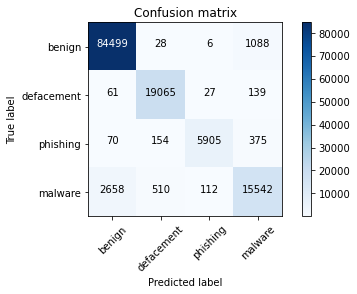

In [72]:


cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1,2,3])
plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])



In [73]:
model = xgb.XGBClassifier(n_estimators= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.97      0.99      0.98     19292
           2       0.98      0.92      0.95      6504
           3       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


Confusion matrix, without normalization


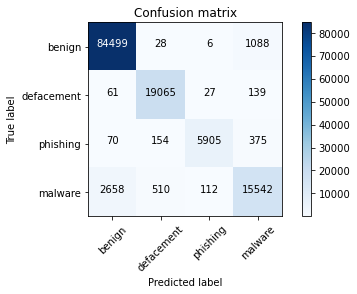

In [74]:


CM=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])



In [75]:


xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()



In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     85621
           1       0.90      0.97      0.94     19292
           2       0.93      0.78      0.85      6504
           3       0.88      0.74      0.81     18822

    accuracy                           0.94    130239
   macro avg       0.92      0.87      0.89    130239
weighted avg       0.94      0.94      0.94    130239

accuracy:   0.938


Confusion matrix, without normalization


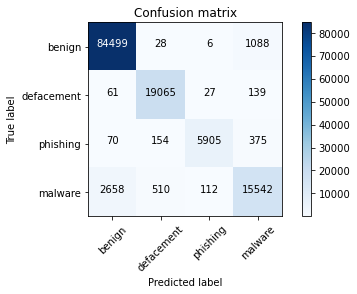

In [77]:


CM=confusion_matrix(y_test,y_pred,labels=[0,1,2,3])

plot_confusion_matrix(cm,classes=['benign', 'defacement','phishing','malware'])



Saving the best model to pickle file

In [78]:
joblib_file = "model.pkl"  
joblib.dump(LGB_C, joblib_file)

['model.pkl']

In [79]:
print(X_test)

        use_of_ip  abnormal_url  count.  count-www  count@  count_dir  \
267692          0             0       2          0       0          1   
385841          0             0       4          0       0          2   
121418          0             0       1          0       0          1   
208450          0             0       1          0       0          0   
110649          0             0       1          0       0          2   
...           ...           ...     ...        ...     ...        ...   
319141          0             1       3          0       0          2   
202531          0             0       1          0       0          4   
300406          0             0       1          0       0          1   
34687           0             1       2          0       0          1   
519775          0             1       3          1       0          1   

        count_embed_domian  short_url  count-https  count-http  ...  count?  \
267692                   0          0       

In [80]:
pd.DataFrame(np.array([[0,0,3,2,0,0,0,0,0,1,0,0,0,16,0,0,0,None,-1,0,13]]), columns=['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@','count_dir', 'count_embed_domian', 'short_url', 'count-https','count-http', 'count%', 'count?', 'count-', 'count=', 'url_length','hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits','count-letters'])

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,3,2,0,0,0,0,0,1,...,0,0,16,0,0,0,None,-1,0,13


In [81]:
joblib_LR_model = joblib.load(joblib_file)
joblib_LR_model

# model1 = pickle.load(open('model.pkl', 'rb'))
# prediction = model1.predict(pd.DataFrame(np.array([[0,0,3,2,0,0,0,0,0,1,0,0,0,16,0,0,0,0,-1,0,13]]), columns=['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@','count_dir', 'count_embed_domian', 'short_url', 'count-https','count-http', 'count%', 'count?', 'count-', 'count=', 'url_length','hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits','count-letters']))
# print(prediction)

Ypredict = joblib_LR_model.predict(pd.DataFrame(np.array([[0,0,3,2,0,0,0,0,0,1,0,0,0,16,0,0,0,0,-1,0,13]]), columns=['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@','count_dir', 'count_embed_domian', 'short_url', 'count-https','count-http', 'count%', 'count?', 'count-', 'count=', 'url_length','hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits','count-letters']))  

Ypredict[0]

0